In [1]:
import pandas as pd

# Membaca dataset water_potability
file_path = '/Users/alhafeez/Documents/smt7/bengkod/uas/water_potability.csv'  # Ganti dengan path yang sesuai
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama
print(data.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [2]:
# Informasi dasar dataset
print("Informasi Dataset:")
print(data.info())

# Menampilkan jumlah baris dan kolom
print("\nJumlah Baris dan Kolom:")
print(data.shape)

# Menampilkan jumlah nilai unik di setiap kolom
print("\nJumlah Nilai Unik per Kolom:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} nilai unik")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Jumlah Baris dan Kolom:
(3276, 10)

Jumlah Nilai Unik per Kolom:
ph: 2785 nilai unik
Hardness: 3276 nilai unik
Solids: 3276 nilai unik
Chloramines: 3276 nilai unik
Sulfate: 2495 nilai unik
Conductivity: 3276 nilai unik
Organic_carbon: 3276 nilai unik
Trihalomethan

In [3]:
import numpy as np

# Cek missing values
print("Jumlah Missing Values per Kolom:")
print(data.isnull().sum())

# Menghitung persentase missing values
print("\nPersentase Missing Values:")
print(data.isnull().mean() * 100)

# Imputasi missing values dengan mean
data_imputed = data.fillna(data.mean())
print("\nMissing Values Setelah Imputasi:")
print(data_imputed.isnull().sum())

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Deteksi outlier di setiap kolom numerik
print("\nJumlah Outlier per Kolom Numerik:")
for col in data.columns:
    if data[col].dtype != 'object':  # Hanya untuk kolom numerik
        outliers = detect_outliers_iqr(data[col].dropna())
        print(f"{col}: {outliers.sum()} outliers")


Jumlah Missing Values per Kolom:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Persentase Missing Values:
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Missing Values Setelah Imputasi:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Jumlah Outlier per Kolom Numerik:
ph: 46 outliers
Hardness: 83 outliers
Solids: 47 outliers
Chloramines: 61 outliers
Sulfate: 41 outl

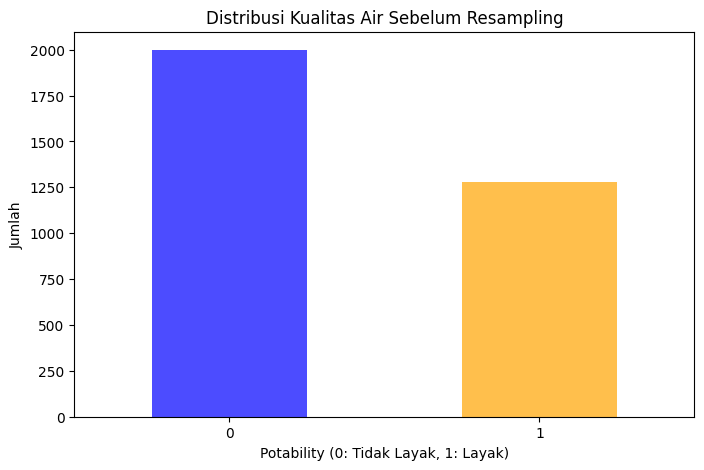

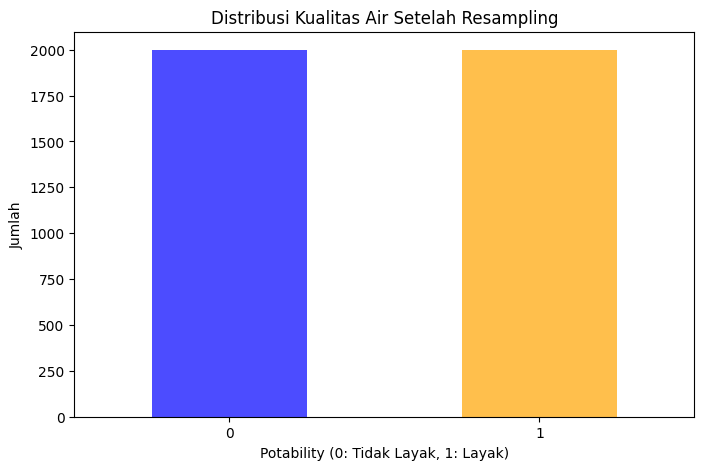

In [4]:
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Visualisasi distribusi sebelum resampling
plt.figure(figsize=(8, 5))
data['Potability'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Distribusi Kualitas Air Sebelum Resampling")
plt.xlabel("Potability (0: Tidak Layak, 1: Layak)")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()

# Resampling untuk mengatasi ketidakseimbangan data
class_0 = data[data['Potability'] == 0]
class_1 = data[data['Potability'] == 1]

# Resample kelas minoritas (1) untuk menyamakan jumlah dengan kelas mayoritas (0)
class_1_resampled = resample(class_1, 
                             replace=True,    # Sampling dengan penggantian
                             n_samples=len(class_0),  # Menyamakan jumlah kelas mayoritas
                             random_state=42)  # Untuk replikasi hasil

# Gabungkan kembali data setelah resampling
data_resampled = pd.concat([class_0, class_1_resampled])

# Visualisasi distribusi setelah resampling
plt.figure(figsize=(8, 5))
data_resampled['Potability'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Distribusi Kualitas Air Setelah Resampling")
plt.xlabel("Potability (0: Tidak Layak, 1: Layak)")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()



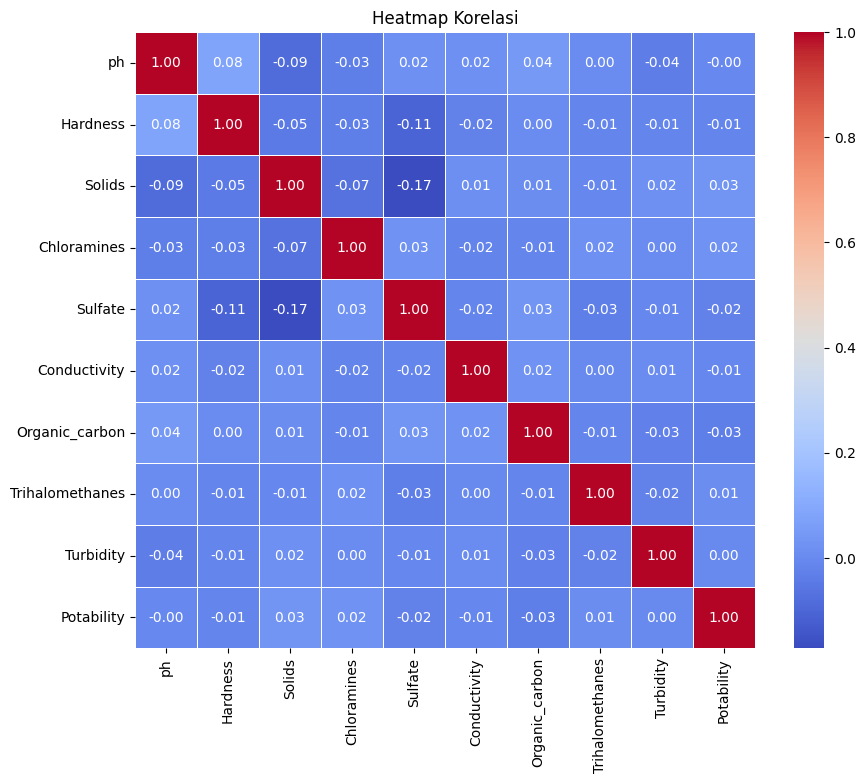

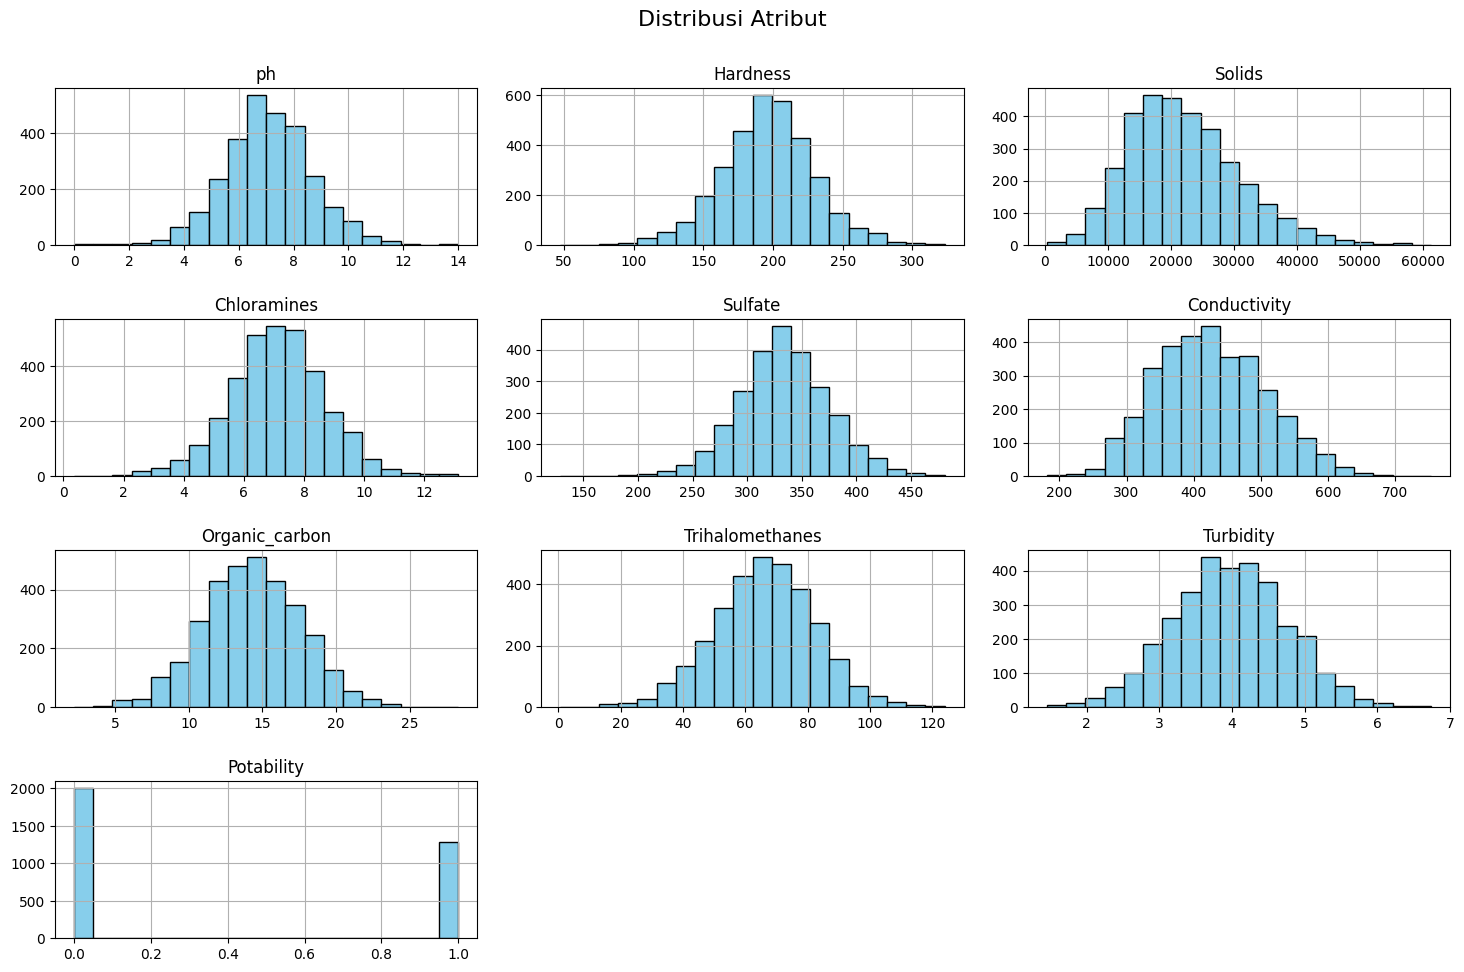

In [5]:
import seaborn as sns

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

# Visualisasi distribusi atribut menggunakan histogram
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Atribut", fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()


=== Model: KNN ===
Before Scaling:
Accuracy: 0.57
Confusion Matrix:
[[298 102]
 [177  79]]


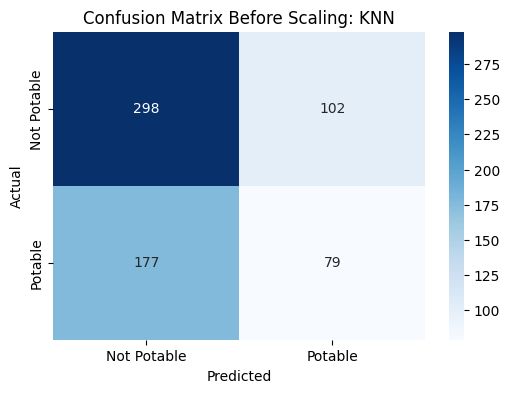

After Scaling:
Accuracy: 0.61
Confusion Matrix:
[[319  81]
 [174  82]]


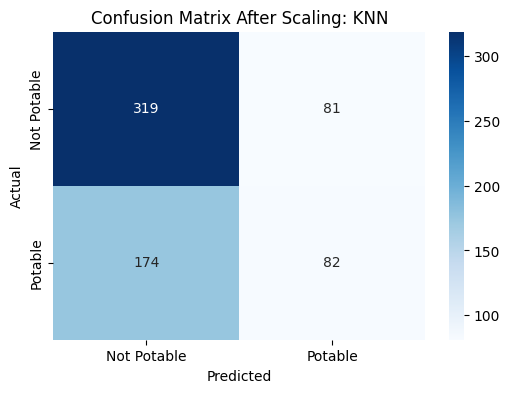


=== Model: Decision Tree ===
Before Scaling:
Accuracy: 0.60
Confusion Matrix:
[[282 118]
 [142 114]]


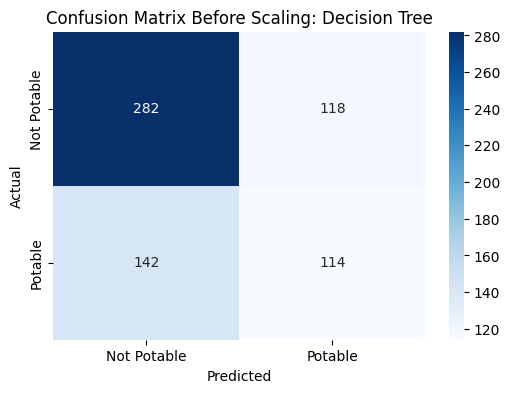

After Scaling:
Accuracy: 0.60
Confusion Matrix:
[[282 118]
 [142 114]]


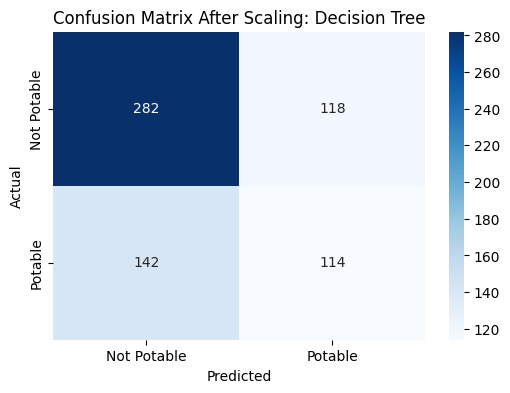


=== Model: Naive Bayes ===
Before Scaling:
Accuracy: 0.61
Confusion Matrix:
[[354  46]
 [209  47]]


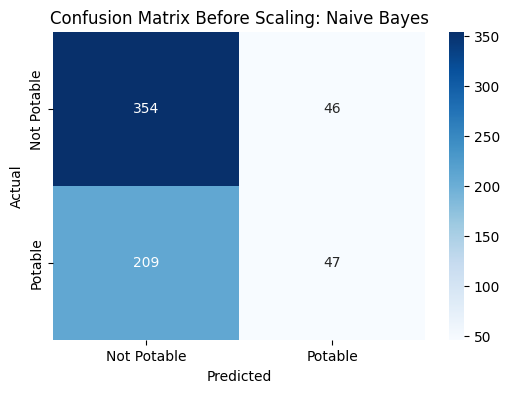

After Scaling:
Accuracy: 0.61
Confusion Matrix:
[[355  45]
 [208  48]]


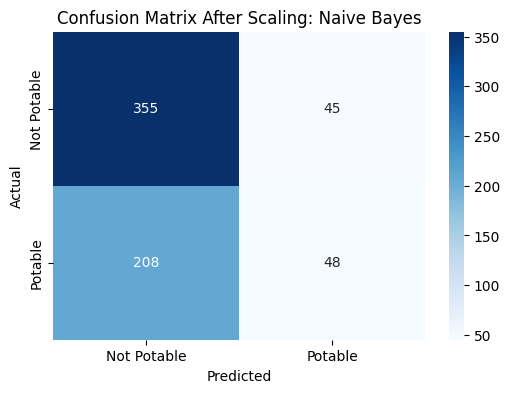


=== Perbandingan Akurasi Model Sebelum dan Setelah Scaling ===
KNN - Before Scaling: 0.57, After Scaling: 0.61
Decision Tree - Before Scaling: 0.60, After Scaling: 0.60
Naive Bayes - Before Scaling: 0.61, After Scaling: 0.61


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Split data menjadi fitur dan target
X = data_imputed.drop('Potability', axis=1)
y = data_imputed['Potability']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi data untuk algoritma yang sensitif terhadap skala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary untuk menyimpan hasil model
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Dictionary untuk menyimpan hasil
results_before_scaling = {}
results_after_scaling = {}

# Melatih dan mengevaluasi model
for model_name, model in models.items():
    print(f"\n=== Model: {model_name} ===")
    
    # --- Sebelum normalisasi ---
    print("Before Scaling:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Akurasi sebelum normalisasi
    acc_before = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc_before:.2f}")
    
    # Confusion Matrix sebelum normalisasi
    cm_before = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm_before)
    
    # Visualisasi Confusion Matrix sebelum normalisasi
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_before, annot=True, fmt="d", cmap='Blues', xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f"Confusion Matrix Before Scaling: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    results_before_scaling[model_name] = acc_before
    
    # --- Setelah normalisasi ---
    print("After Scaling:")
    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)
    
    # Akurasi setelah normalisasi
    acc_after = accuracy_score(y_test, y_pred_scaled)
    print(f"Accuracy: {acc_after:.2f}")
    
    # Confusion Matrix setelah normalisasi
    cm_after = confusion_matrix(y_test, y_pred_scaled)
    print("Confusion Matrix:")
    print(cm_after)
    
    # Visualisasi Confusion Matrix setelah normalisasi
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_after, annot=True, fmt="d", cmap='Blues', xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f"Confusion Matrix After Scaling: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    results_after_scaling[model_name] = acc_after

# Membandingkan akurasi model sebelum dan setelah normalisasi
print("\n=== Perbandingan Akurasi Model Sebelum dan Setelah Scaling ===")
for model_name in models.keys():
    acc_before = results_before_scaling[model_name]
    acc_after = results_after_scaling[model_name]
    print(f"{model_name} - Before Scaling: {acc_before:.2f}, After Scaling: {acc_after:.2f}")
